# **Comparing Models**

#### **Learning Points**
- Define model selection.
- Use the one-standard error method to select a model.
- Use information criteria and adjusted R-squared to compare models.
- Implement the one-standard error method using scikit-learn and matplotlib.

#### **Model selection**

A model should be simple enough so that noise is not incorporated into the model (overfitting). However, the model should be complex enough to capture the underlying trend of the data without missing the trend completely (underfitting). ***Model selection*** is the process of choosing a model that best generalizes a population or process from a list of candidate models.

To carry out model selection, a method of model evaluation such as cross-validation or the bootstrap method is first used to calculate metric scores, then a model is selected based on the metric scores. The ***one-standard error method*** for model selection is to find the model with the minimum mean score, then select the simplest model whose mean score falls within one standard deviation.


#### **Model selection in Python**
errorbar() can be used to output a line chart of the mean metric scores and one standard deviation for a list of candidate models so that model selection can take place. The full list of parameters for errorbar() is found in matplotlib documentation. The mean metric scores and standard deviations used as input should be calculated using a method like k-fold cross-validation or the bootstrap method and an appropriate scorer such as mean square error or root mean squared error.

Models trained using the scikit-learn package cannot output R-squared(adj), AIC, or BIC. To carry out model selection using such alternative methods, the formulas must be implemented by the user, or an alternative package/statistical software like statsmodels must be used.

In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# Create the DataFrame
data = {
    'log(Density)': [80.574, 84.248, 87.264, 87.195, 89.076, 89.608, 89.868, 90.101, 92.405, 95.854, 100.696, 101.060, 401.672, 390.724, 567.534, 635.316, 733.054, 759.087, 894.206, 990.785, 1090.109, 1080.914, 1122.643, 1178.351, 1260.531, 1273.514, 1288.339, 1327.543, 1353.863, 1414.509, 1425.208, 1421.384, 1442.962, 1464.350, 1468.705, 1447.894, 1457.628],
    'Electron mobility': [-3.067, -2.981, -2.921, -2.912, -2.840, -2.797, -2.702, -2.699, -2.633, -2.481, -2.363, -2.322, -1.501, -1.460, -1.274, -1.212, -1.100, -1.046, -0.915, -0.714, -0.566, -0.545, -0.400, -0.309, -0.109, -0.103, 0.010, 0.119, 0.377, 0.790, 0.963, 1.006, 1.115, 1.572, 1.841, 2.047, 2.200]
}

thurber = pd.DataFrame(data)

# Split off 20% of the data to be left out as test data
thurberTrainingData, test_data = train_test_split(thurber, test_size=0.20)

# Store relevant columns as variables
X = thurberTrainingData[['log(Density)']].values.reshape(-1, 1)
y = thurberTrainingData[['Electron mobility']].values.reshape(-1, 1)

Text(0, 0.5, 'Electron mobility')

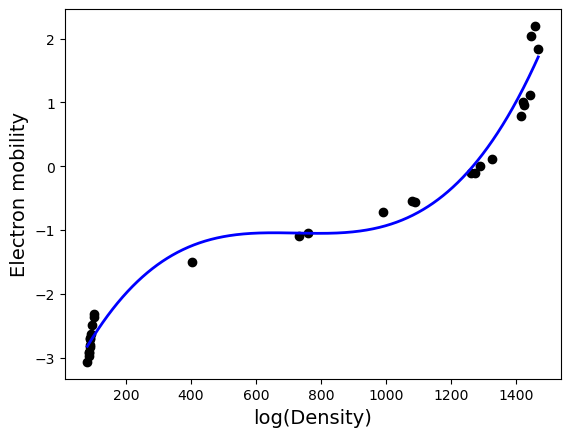

In [6]:
# Fit a cubic regression model
polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
XPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(XPoly, y)

# Graph the scatterplot and the polynomial regression
plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('log(Density)', fontsize=14)
plt.ylabel('Electron mobility', fontsize=14)

In [7]:
# Collect cross-validation metrics
cvMeans = []
cvStdDev = []

for i in range(1, 7):
    # Fit a degree i polynomial regression model
    polyFeatures = PolynomialFeatures(degree=i, include_bias=False)
    XPoly = polyFeatures.fit_transform(X)
    polyModel = LinearRegression()
    polyModel.fit(XPoly, y)

    # Carry out 10-fold cross-validation for the a degree i polynomial regression model
    polyscore = -cross_val_score(
        polyModel, XPoly, y, scoring='neg_mean_squared_error', cv=10
    )

    # Store the mean and standard deviation of the 10-fold cross-validation for the degree i polynomial regression model
    cvMeans.append(np.mean(polyscore))
    cvStdDev.append(np.std(polyscore))

Text(0, 0.5, 'Mean squared error')

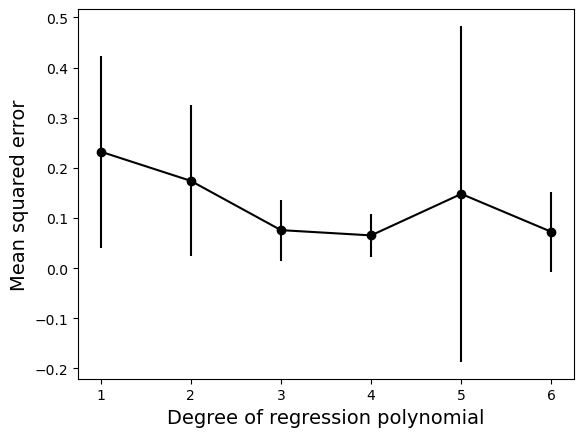

In [8]:
# Graph the errorbar chart using the cross-validation means and std deviations
plt.errorbar(x=range(1, 7), y=cvMeans, yerr=cvStdDev, marker='o', color='black')
plt.xlabel('Degree of regression polynomial', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)